## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
import tensorflow as tf
tf.reset_default_graph()
tf.set_random_seed(42)

In [2]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras

import pickle
from matplotlib import pyplot as plt
import seaborn as sns
import vis

Using TensorFlow backend.


In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

### Find dimensions of an image in the dataset

In [8]:
x_train[0].shape

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
x_train_conv = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test_conv = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
y_train_class = keras.utils.to_categorical(y_train, 10)
y_test_class = keras.utils.to_categorical(y_test, 10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train_conv =  x_train_conv.astype("float32") / 255


In [0]:
x_test_conv = x_test_conv.astype("float32") / 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train_conv = x_train.reshape(x_train_conv.shape[0], 28, 28, 1)
x_test_conv = x_test.reshape(x_test_conv.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D,Conv2D
from keras.utils import np_utils

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [14]:
model_simple_conv = Sequential()
model_simple_conv.add(Conv2D(32, (3, 3), activation ="relu", input_shape=(28, 28, 1)))
model_simple_conv.add(Conv2D(32, (3, 3), activation ="relu"))
model_simple_conv.add(Flatten())
model_simple_conv.add(Dense(128, activation='relu'))
model_simple_conv.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
model_simple_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 2,370,282
Trainable params: 2,370,282
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_simple_conv.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [17]:
%%time 
from keras.callbacks import EarlyStopping
early_stopping = [EarlyStopping(patience=5)]
output_pooling_conv = model_simple_conv.fit(x_train_conv, y_train_class, batch_size=512, epochs=10, verbose=2, callbacks=early_stopping,
                    validation_data=(x_test_conv, y_test_class))
                              

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 6.8339 - acc: 0.5081 - val_loss: 0.4776 - val_acc: 0.8276
Epoch 2/10
 - 4s - loss: 0.3353 - acc: 0.8784 - val_loss: 0.3375 - val_acc: 0.8773
Epoch 3/10
 - 4s - loss: 0.2161 - acc: 0.9201 - val_loss: 0.3411 - val_acc: 0.8842
Epoch 4/10
 - 4s - loss: 0.1481 - acc: 0.9451 - val_loss: 0.3590 - val_acc: 0.8863
Epoch 5/10
 - 4s - loss: 0.1054 - acc: 0.9618 - val_loss: 0.3730 - val_acc: 0.8908
Epoch 6/10
 - 4s - loss: 0.0711 - acc: 0.9752 - val_loss: 0.4212 - val_acc: 0.8868
Epoch 7/10
 - 4s - loss: 0.0475 - acc: 0.9841 - val_loss: 0.4348 - val_acc: 0.8865
CPU times: user 17.8 s, sys: 6.86 s, total: 24.7 s
Wall time: 29.5 s


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [18]:
model_pooling_conv = Sequential()
model_pooling_conv.add(Conv2D(32, (3, 3), activation ="relu", input_shape=(28, 28, 1)))
model_pooling_conv.add(MaxPooling2D(pool_size=(2, 2)))
model_pooling_conv.add(Dropout(0.25))
model_pooling_conv.add(Conv2D(32, (3, 3), activation ="relu"))
model_pooling_conv.add(MaxPooling2D(pool_size=(2, 2)))
model_pooling_conv.add(Dropout(0.25))
model_pooling_conv.add(Flatten())
model_pooling_conv.add(Dense(128, activation='relu'))
model_pooling_conv.add(Dense(10, activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [19]:
model_pooling_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
__________

In [0]:
model_pooling_conv.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [21]:
%%time 
from keras.callbacks import EarlyStopping
output_pooling_conv = model_pooling_conv.fit(x_train_conv, y_train_class, batch_size=512, epochs=10, verbose=2, callbacks=early_stopping,
                    validation_data=(x_test_conv, y_test_class))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 3s - loss: 6.4410 - acc: 0.4591 - val_loss: 0.8659 - val_acc: 0.7031
Epoch 2/10
 - 2s - loss: 0.7371 - acc: 0.7278 - val_loss: 0.5872 - val_acc: 0.7798
Epoch 3/10
 - 2s - loss: 0.5783 - acc: 0.7834 - val_loss: 0.4898 - val_acc: 0.8180
Epoch 4/10
 - 2s - loss: 0.5164 - acc: 0.8073 - val_loss: 0.4450 - val_acc: 0.8372
Epoch 5/10
 - 2s - loss: 0.4758 - acc: 0.8237 - val_loss: 0.4165 - val_acc: 0.8472
Epoch 6/10
 - 2s - loss: 0.4416 - acc: 0.8358 - val_loss: 0.4110 - val_acc: 0.8458
Epoch 7/10
 - 2s - loss: 0.4172 - acc: 0.8477 - val_loss: 0.3783 - val_acc: 0.8637
Epoch 8/10
 - 2s - loss: 0.3911 - acc: 0.8558 - val_loss: 0.3725 - val_acc: 0.8622
Epoch 9/10
 - 2s - loss: 0.3709 - acc: 0.8613 - val_loss: 0.3479 - val_acc: 0.8707
Epoch 10/10
 - 2s - loss: 0.3575 - acc: 0.8684 - val_loss: 0.3411 - val_acc: 0.8773
CPU times: user 17.1 s, sys: 5.31 s, total: 22.4 s
Wall time: 24.2 s


### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    rotation_range=25,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

In [0]:
datagen.fit(x_train_conv)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

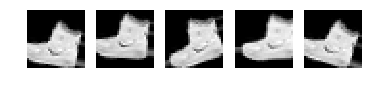

In [25]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_conv[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [26]:
x_train_conv[:1].shape

(1, 28, 28, 1)

In [0]:
datagen.fit(x_train_conv[:1])

In [0]:
samples = datagen.flow(x_train_conv[:1])

In [0]:
#image = []
#for i in range(3):
 #   img = samples.next()
 #   img = img.squeeze()
 #   image.append(vis.imshow(img))
#image[0] | image[1] | image[2]

###  Report the final train and validation accuracy

In [30]:
model_pooling_conv.evaluate(x_test_conv,y_test_class)

10000/10000 [==============================] - 1s 67us/step


[0.3410657127141952, 0.8773]